# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score


# Generate a custom datset

In [2]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Visualize

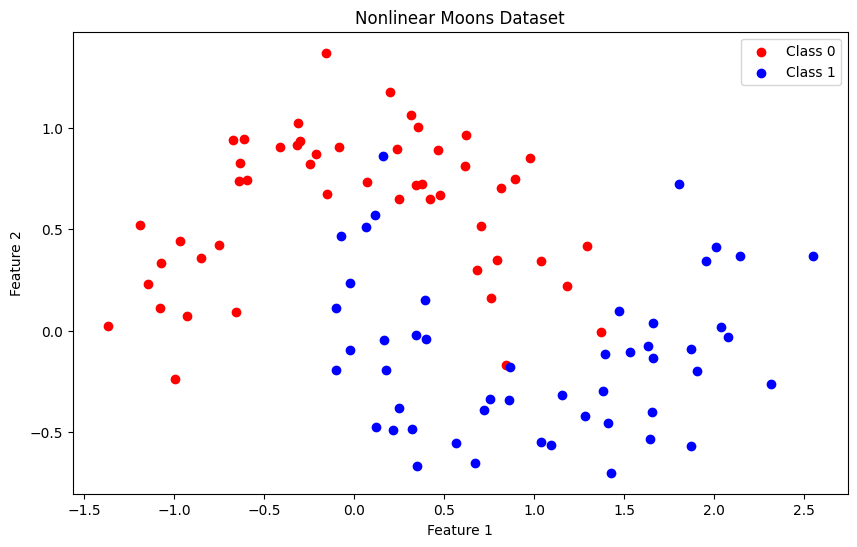

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Nonlinear Moons Dataset')
plt.legend()
plt.show()


# Fit

In [4]:
model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

# Evaluate

In [5]:
y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.86


# Plot

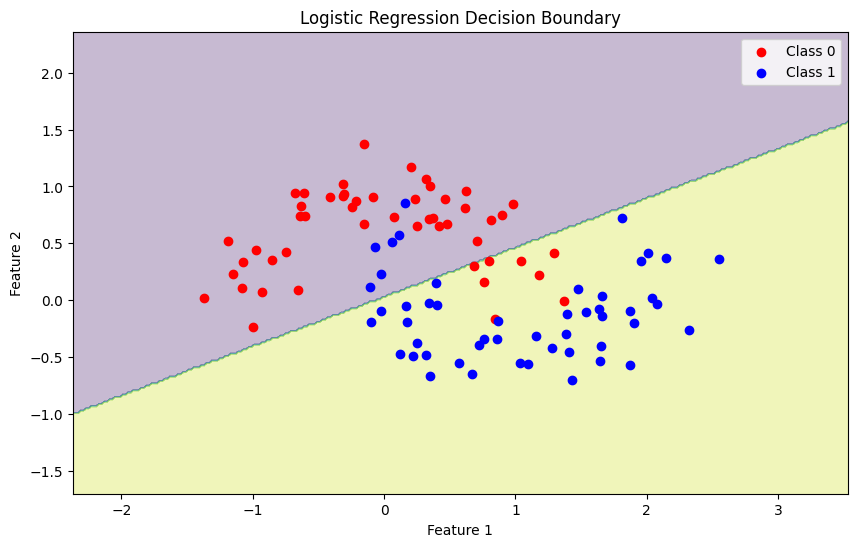

In [6]:
def plot_decision_boundary(model, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

plot_decision_boundary(model, X, y, 'Logistic Regression Decision Boundary')


# Add features

## Polynomial Feature Generation

Given a dataset with features \( x_1 \) and \( x_2 \), we can generate polynomial features up to a specified degree. For a degree of 5, polynomial features include not only the original features but also their various combinations and powers.

### Polynomial Feature Expansion for Degree 2

For clarity, let's first consider polynomial features up to degree 2:

**Original Features:** 
\( x_1 \) and \( x_2 \)

**Degree 2 Polynomial Features:**
\[
\begin{aligned}
&1 \text{ (constant term)} \\
&x_1 \\
&x_2 \\
&x_1^2 \\
&x_2^2 \\
&x_1 \cdot x_2 \\
\end{aligned}
\]

In [7]:
poly = PolynomialFeatures(degree=5)
model = make_pipeline(poly, LogisticRegression())
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('logisticregression', LogisticRegression())])

# Evaluate

In [8]:
y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f'Polynomial Logistic Regression Accuracy: {accuracy:.2f}')


Polynomial Logistic Regression Accuracy: 0.95


# Plot

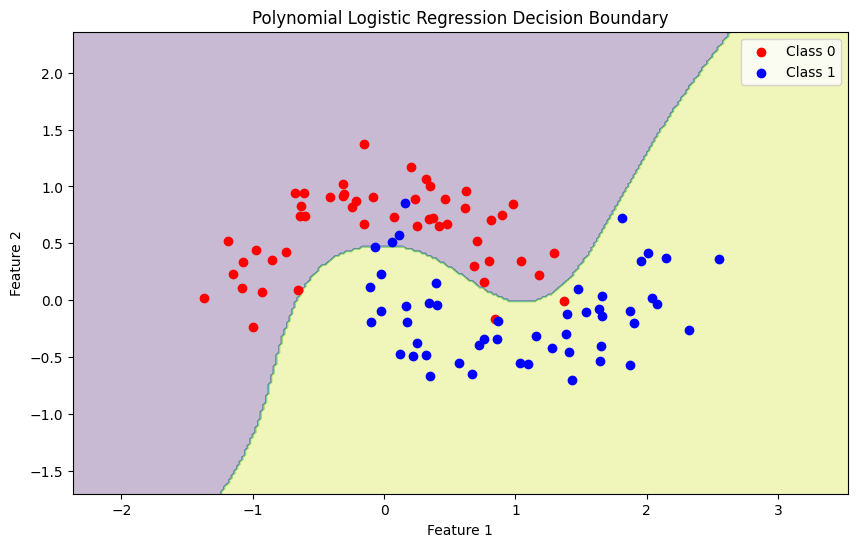

In [9]:
plot_decision_boundary(model, X, y, 'Polynomial Logistic Regression Decision Boundary')
